In [54]:
# Import Necessary data for exploring data 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
pd.options.display.float_format = '{:.2f}'.format

In [53]:
pip install plotly

  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


### Import datas data set

In [2]:
train = pd.read_csv(r'C:\Users\Propriétaire\Desktop\Final Project\train.csv')
oil = pd.read_csv(r'C:\Users\Propriétaire\Desktop\Final Project\oil.csv')
stores = pd.read_csv(r'C:\Users\Propriétaire\Desktop\Final Project\stores.csv')
holidays_events = pd.read_csv(r'C:\Users\Propriétaire\Desktop\Final Project\holidays_events.csv')
transactions = pd.read_csv(r'C:\Users\Propriétaire\Desktop\Final Project\transactions.csv')
sample_submission = pd.read_csv(r'C:\Users\Propriétaire\Desktop\Final Project\sample_submission.csv')

### Analyze To Find out the below stuff
Data shape,
Data format,
Missing values,
Outliers.

### SALES DATA 

In [3]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
train.shape

(3000888, 6)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [6]:
# checking missing value

train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [7]:
train['date'] = train['date'].astype('datetime64[ns]')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


### Oil data set

In [9]:
oil.shape

(1218, 2)

In [10]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [11]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [12]:
oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [13]:
# there is some missing data 

In [14]:
# transform format fo date time from object to date format
oil['date'] = oil['date'].astype('datetime64[ns]')

In [15]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


### Stores data set

In [16]:
stores.shape

(54, 5)

In [17]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [18]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [19]:
stores.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [20]:
stores.	store_nbr.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int64)

### holidays_events

In [21]:
holidays_events.shape

(350, 6)

In [22]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [23]:
holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [24]:
holidays_events.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [25]:
# transform format fo date time from object to date format
holidays_events['date'] = holidays_events['date'].astype('datetime64[ns]')

In [26]:
holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


### sample_submission data set

In [27]:
sample_submission.shape

(28512, 2)

In [28]:
sample_submission.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [29]:
sample_submission.isna().sum()

id       0
sales    0
dtype: int64

In [30]:
sample_submission.sales.sum()
# there is no data it seems that this data is unusefull for our analysis 

0.0

### Transactions data set

In [31]:
transactions.shape

(83488, 3)

In [32]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [33]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [34]:
transactions.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [35]:
# transform format fo date time from object to date format
transactions['date'] = transactions['date'].astype('datetime64[ns]')

In [36]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [37]:
transactions.describe()

,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


In [38]:
transactions.store_nbr.unique()

array([25,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39,
       40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 36, 53, 20, 29, 21,
       42, 22, 52], dtype=int64)

In [41]:
transactions.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

### Mergin different data in one Dataframe

In [40]:
data = pd.merge(train.groupby(["date", "store_nbr"]).sales.sum().reset_index(), transactions, how = "left")
data.head()

,date,store_nbr,sales,transactions
0,2013-01-01,1,0.0,NaN
1,2013-01-01,2,0.0,NaN
2,2013-01-01,3,0.0,NaN
3,2013-01-01,4,0.0,NaN
4,2013-01-01,5,0.0,NaN


In [41]:
df=pd.merge(train,stores, on=['store_nbr'], how='left')
df

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6


In [42]:
df=pd.merge(df, oil, on=['date'], how='left')
df

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57


In [43]:
df=pd.merge(df, holidays_events, on=['date'], how='left')
df

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [44]:
df.shape

(3054348, 16)

In [45]:
df=pd.merge(df, transactions, on=['date', 'store_nbr' ], how='left')
df

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0


In [46]:
df.shape

(3054348, 17)

In [47]:
# sorting data by date 
df = df.sort_values(by="date")

In [48]:
df

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1194,1194,2013-01-01,42,CELEBRATION,0.000,0,Cuenca,Azuay,D,2,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1193,1193,2013-01-01,42,BREAD/BAKERY,0.000,0,Cuenca,Azuay,D,2,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1192,1192,2013-01-01,42,BOOKS,0.000,0,Cuenca,Azuay,D,2,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1191,1191,2013-01-01,42,BEVERAGES,0.000,0,Cuenca,Azuay,D,2,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053153,2999693,2017-08-15,25,PET SUPPLIES,3.000,0,Salinas,Santa Elena,D,1,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,849.0
3053152,2999692,2017-08-15,25,PERSONAL CARE,93.000,8,Salinas,Santa Elena,D,1,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,849.0
3053151,2999691,2017-08-15,25,MEATS,180.107,0,Salinas,Santa Elena,D,1,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,849.0
3053162,2999702,2017-08-15,26,BEAUTY,0.000,0,Guayaquil,Guayas,D,10,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,534.0


In [49]:
'''The data is very big so we decided to take 3% sample of data and do the models on that samle, as it was hard to execute the models in the rational time with all of the data'''

#df1, df2 = np.split(df, [int(.03 *len(df))])

'The data is very big so we decided to take 3% sample of data and do the models on that samle, as it was hard to execute the models in the rational time with all of the data'

<Figure size 720x432 with 0 Axes>

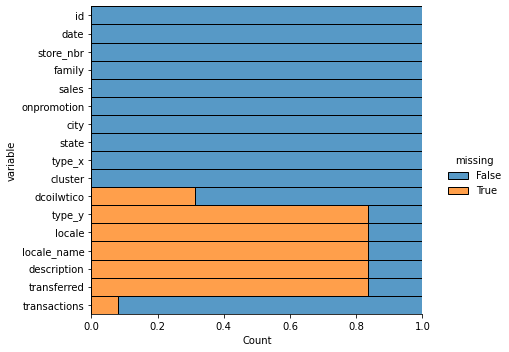

In [52]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y='variable',
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)


In [53]:
# the most number of missing values are coming from holydays_event data.
# fill description by non_event : is considered as normal day or working day
# fill transferred by no_transf 
# fill local_name by no_name
# fill local by no_loc
# type_y by no_type

In [54]:
df["transferred"].fillna("no_transf", inplace = True)
df["description"].fillna("no_event", inplace = True)
df["locale_name"].fillna("no_name", inplace = True)
df["locale"].fillna("no_loc", inplace = True)
df["type_y"].fillna("no_type", inplace = True)

<Figure size 720x432 with 0 Axes>

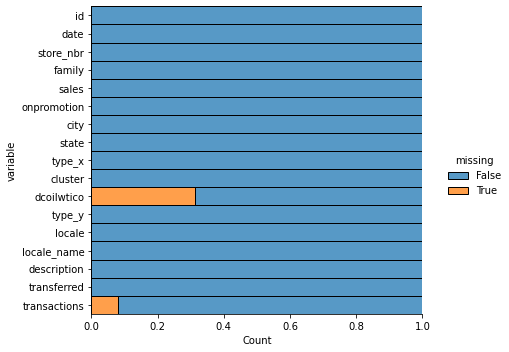

In [55]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y='variable',
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [56]:
# use interpolat method to fill oil price

In [57]:
df['dcoilwtico'].interpolate(method="linear", inplace = True)

In [58]:
df['dcoilwtico'].interpolate(method="linear", limit_direction ='backward', inplace = True)

In [59]:
df.dcoilwtico.isna().sum()

0

<Figure size 720x432 with 0 Axes>

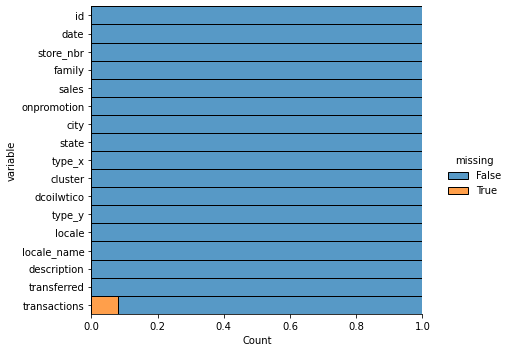

In [60]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y='variable',
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [61]:
df.transactions.isna().sum()

249117

In [62]:
a = df[df["transactions"].isna()]
a

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1194,1194,2013-01-01,42,CELEBRATION,0.00,0,Cuenca,Azuay,D,2,93.14,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1193,1193,2013-01-01,42,BREAD/BAKERY,0.00,0,Cuenca,Azuay,D,2,93.14,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1192,1192,2013-01-01,42,BOOKS,0.00,0,Cuenca,Azuay,D,2,93.14,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1191,1191,2013-01-01,42,BEVERAGES,0.00,0,Cuenca,Azuay,D,2,93.14,Holiday,National,Ecuador,Primer dia del ano,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838498,2790384,2017-04-19,52,BEVERAGES,0.00,0,Manta,Manabi,A,11,50.49,no_type,no_loc,no_name,no_event,no_transf,NaN
2838497,2790383,2017-04-19,52,BEAUTY,0.00,0,Manta,Manabi,A,11,50.49,no_type,no_loc,no_name,no_event,no_transf,NaN
2838496,2790382,2017-04-19,52,BABY CARE,0.00,0,Manta,Manabi,A,11,50.49,no_type,no_loc,no_name,no_event,no_transf,NaN
2838495,2790381,2017-04-19,52,AUTOMOTIVE,0.00,0,Manta,Manabi,A,11,50.49,no_type,no_loc,no_name,no_event,no_transf,NaN


In [63]:
## here we look when sales value is 0, transactions value is NaN, there is 249117 rows with NaN value
# let's explore more 

In [64]:
a = df.loc[(df["transactions"].isna()) & (df['sales'] == 0)]
a

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1194,1194,2013-01-01,42,CELEBRATION,0.00,0,Cuenca,Azuay,D,2,93.14,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1193,1193,2013-01-01,42,BREAD/BAKERY,0.00,0,Cuenca,Azuay,D,2,93.14,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1192,1192,2013-01-01,42,BOOKS,0.00,0,Cuenca,Azuay,D,2,93.14,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1191,1191,2013-01-01,42,BEVERAGES,0.00,0,Cuenca,Azuay,D,2,93.14,Holiday,National,Ecuador,Primer dia del ano,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838498,2790384,2017-04-19,52,BEVERAGES,0.00,0,Manta,Manabi,A,11,50.49,no_type,no_loc,no_name,no_event,no_transf,NaN
2838497,2790383,2017-04-19,52,BEAUTY,0.00,0,Manta,Manabi,A,11,50.49,no_type,no_loc,no_name,no_event,no_transf,NaN
2838496,2790382,2017-04-19,52,BABY CARE,0.00,0,Manta,Manabi,A,11,50.49,no_type,no_loc,no_name,no_event,no_transf,NaN
2838495,2790381,2017-04-19,52,AUTOMOTIVE,0.00,0,Manta,Manabi,A,11,50.49,no_type,no_loc,no_name,no_event,no_transf,NaN


In [65]:
## there is 245869 transactions value when sales value is 0
# so we decided to replace NaN values by 0

In [66]:
df['transactions'].fillna(0, inplace=True)

<Figure size 720x432 with 0 Axes>

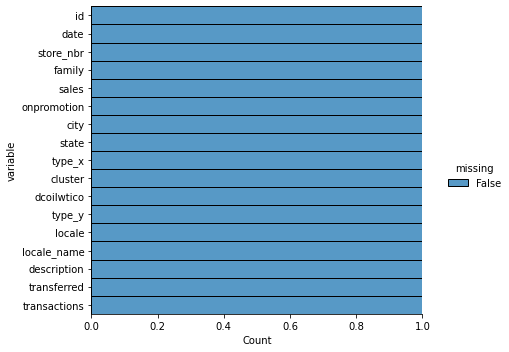

In [67]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y='variable',
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

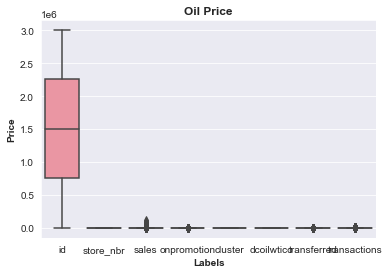

In [51]:
## checking outliers

sns.set_palette("Blues_d")
sns.set_style('darkgrid')
sns.boxplot(data=df)
plt.title('Oil Price', fontweight='bold')
plt.ylabel('Price', fontweight='bold')
plt.xlabel('Labels', fontweight='bold')
plt.show()

In [ ]:
plt.boxplot

In [ ]:
# Data is cleaned 

In [68]:
df.to_csv(r'C:\Users\Propriétaire\Desktop\Final Project\cleaned_data.csv', index=False)